In [35]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
%matplotlib inline

In [36]:
df = pd.read_csv('apple.csv')
df = df.filter(['Date','Adj Close'], axis=1)
df.head()

,Date,Adj Close
0,2017-02-27,136.929993
1,2017-02-24,136.660004
2,2017-02-23,136.529999
3,2017-02-22,137.110001
4,2017-02-21,136.699997


In [37]:
df = df.rename(index=str, columns={ 'Date': 'ds', 'Adj Close': 'y'})
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2017-02-27,4.919470
1,2017-02-24,4.917496
2,2017-02-23,4.916544
3,2017-02-22,4.920784
4,2017-02-21,4.917789


In [38]:
train_df = df[500:]
predict_df = df[:500]

m = Prophet()
m.fit(train_df);

In [39]:
future = m.make_future_dataframe(periods=500)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9125,2016-07-12,4.966769,4.499428,5.422429
9126,2016-07-13,4.970028,4.504307,5.428073
9127,2016-07-14,4.971988,4.549942,5.407172
9128,2016-07-15,4.967881,4.537676,5.435762
9129,2016-07-16,5.270836,4.857402,5.731206


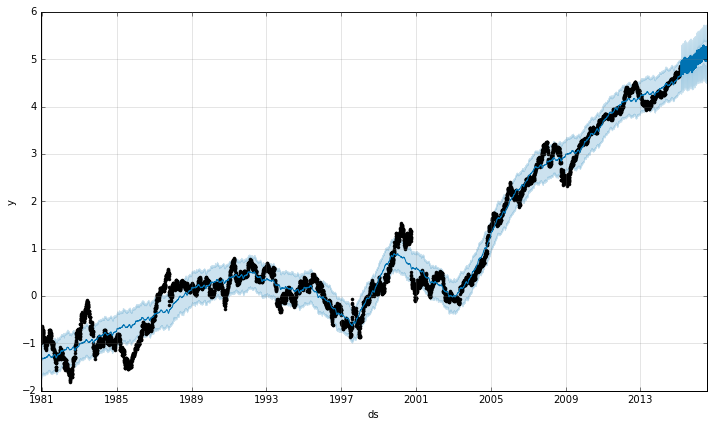

In [40]:
m.plot(forecast);